# Gaussian kernel fuzzy c-means with width parameters computation

Esse código se propões a implementar o algorítimo de Gaussian kernel fuzzy c-means with width parameters computation (KFCM-K-W.2) presente no artigo: Gaussian Kernel Fuzzy C-Means with Width Parameter Computation and Regularization.
PATTERN RECOGNITION, v. 143, p. 109749, 2023, doi:
https://doi.org/10.1016/j.patcog.2023.109749

Vamos aplicar nas bases de dados:
 * Iris
 * "Multiple features" do site uci machine learning repository (https://archive.ics.uci.edu/dataset/72/multiple+features).
Considere 3 datasets, **mfeat-fac, mfeat-fou,  mfeat-zer**.

  *   Em cada dataset execute o algoritmo KFCM-K-W.2 50 vezes para obter
  uma partição fuzzy em 10 grupos e selecione o melhor resultado segundo
  a função objetivo.
  *   Para cada dataset e partição fuzzy, calcule o Modified partition coefficient. Comente.
  *   Para cada dataset e partição fuzzy, produza uma partição crisp em 10
  grupos e calcule o índice de Rand corrigido. Comente.
  *   Parametros: c = 10; T = 100;  = 10−6; m = 1.6;

  *   Para o melhor resultado segundo a função objetivo mostrar:
  *   i) os protótipos de cada grupo (g1, . . . , gc );
  *   ii) o vetor de parametros de largura de cada grupo (s1, . . . , sc )
  *   iii) a matrix de confusão da partição crisp versus a partição a priori;

---



---

## **1.** *Armazenamento das bases de dados*

---


In [1]:
# Inicialmente, vamos importar as bibliotecas necessárias
import math
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from google.colab import drive
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Conecta ao drive compartilhado do Google Colab
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# Entra na pasta da base de dados
%cd /content/gdrive/MyDrive/Colab/multiple-features

# Lista os arquivos na pasta
!ls

/content/gdrive/MyDrive/Colab/multiple-features
best_res11	     fac.csv	mfeat-fou   mfeat-kar  mfeat-pix  mfeat-zer
df_fac.describe.csv  mfeat-fac	mfeat.info  mfeat-mor  mfeat.tar  Resultados


In [4]:
# Importa as bases de dados requisitadas e as tranforma em Data Frames
df_fac = pd.read_csv('mfeat-fac', header=None, delim_whitespace=True)
df_fou = pd.read_csv('mfeat-fou', header=None, delim_whitespace=True)
df_zer = pd.read_csv('mfeat-zer', header=None, delim_whitespace=True)

---

### **1.2.** *Descrições estatísticas sobre as bases de dados cruas*

---

**MFEAT-FAC:**

In [5]:
df_fac.describe()

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,272.051500,322.725500,774.82450,754.339000,640.460500,684.47200,19.450000,18.373000,15.359000,9.054000,...,727.221500,642.191000,641.214500,687.38100,17.76600,21.584000,17.612000,11.968000,13.704500,13.452500
std,91.275454,109.426588,140.14157,109.173768,48.940117,85.07886,11.351561,7.351795,8.887216,4.084412,...,144.196258,118.559304,56.585656,82.72578,5.23612,7.982343,5.884451,2.579788,1.985485,4.637186
min,67.000000,81.000000,500.00000,543.000000,437.000000,439.00000,0.000000,1.000000,0.000000,0.000000,...,445.000000,425.000000,427.000000,461.00000,1.00000,1.000000,1.000000,4.000000,5.000000,0.000000
25%,208.000000,247.000000,656.75000,667.000000,607.000000,642.00000,10.000000,13.000000,8.000000,5.000000,...,608.750000,546.000000,606.000000,638.00000,14.00000,16.000000,13.000000,10.000000,12.000000,11.000000
50%,274.500000,324.000000,766.00000,736.000000,636.500000,676.00000,20.000000,18.000000,15.000000,10.000000,...,725.000000,626.500000,641.000000,682.00000,18.00000,23.000000,18.000000,12.000000,14.000000,15.000000
75%,338.000000,406.000000,879.00000,830.000000,667.000000,716.00000,29.000000,24.000000,22.000000,12.000000,...,836.000000,724.250000,673.000000,735.00000,22.00000,27.000000,21.000000,14.000000,15.000000,17.000000
max,515.000000,565.000000,1264.00000,1134.000000,823.000000,1047.00000,42.000000,39.000000,39.000000,17.000000,...,1211.000000,1012.000000,853.000000,1049.00000,30.00000,38.000000,36.000000,18.000000,19.000000,23.000000


**MFEAT-FOU:**

In [6]:
df_fou.describe()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.185544,0.377311,0.269378,0.265686,0.300367,0.158314,0.364771,0.247213,0.288657,0.151716,...,0.123502,0.128409,0.157977,0.182965,0.149957,0.166702,0.230956,0.267786,0.143982,0.217792
std,0.091898,0.176231,0.137980,0.110694,0.156256,0.089022,0.144367,0.123856,0.115912,0.087224,...,0.068823,0.064801,0.090940,0.086309,0.088267,0.091240,0.123441,0.131009,0.085663,0.122908
min,0.004928,0.009000,0.005624,0.010114,0.002090,0.002676,0.011919,0.001737,0.010604,0.002342,...,0.005232,0.003653,0.002424,0.007090,0.003780,0.007784,0.003569,0.011433,0.001136,0.004572
25%,0.112066,0.223410,0.142086,0.195214,0.180421,0.093489,0.278101,0.142938,0.206588,0.084920,...,0.070580,0.078667,0.083558,0.114165,0.079387,0.097974,0.130623,0.157886,0.075864,0.115836
50%,0.176093,0.401208,0.288355,0.255635,0.282515,0.149466,0.367895,0.252802,0.283951,0.136595,...,0.113916,0.121103,0.147262,0.179251,0.137443,0.149127,0.232392,0.251738,0.130413,0.193452
75%,0.270290,0.523692,0.378611,0.325003,0.413297,0.210817,0.442345,0.353647,0.363849,0.202255,...,0.169247,0.171524,0.220204,0.248415,0.205424,0.218640,0.323222,0.388339,0.198687,0.318925
max,0.395772,0.771281,0.665372,0.748012,0.796487,0.483342,0.750938,0.542303,0.702383,0.584942,...,0.397127,0.418783,0.479470,0.490737,0.456282,0.457965,0.601370,0.620857,0.510432,0.582411


**MFEAT-ZER:**

In [7]:
df_zer.describe()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.078554,1.764332,21.708127,69.881897,109.519676,266.027267,147.578565,0.117313,2.612039,24.564107,...,3.846023,38.234141,111.894053,7.537383,185.346722,399.152215,9.206768,86.405616,54.625111,508.902572
std,0.066552,1.159269,11.728827,38.348810,53.202068,124.192494,100.397369,0.086653,1.615522,17.233333,...,2.473214,27.619617,65.211345,3.757990,37.878378,96.330148,6.780826,52.027535,11.190058,71.008030
min,0.001094,0.032385,0.364935,2.240865,3.822781,1.937737,0.045660,0.002745,0.073840,0.559946,...,0.073270,0.320603,1.107045,0.351190,57.557652,109.141060,0.362926,0.753130,19.956263,322.226686
25%,0.032160,0.928543,12.391974,40.587107,69.938353,166.395919,60.878624,0.053369,1.362552,11.906010,...,1.929376,19.130537,56.358750,5.031431,158.815192,329.825175,4.444497,40.332461,46.509687,455.272657
50%,0.057027,1.550141,20.868980,63.220758,106.643071,258.039088,132.145970,0.094367,2.361967,20.464571,...,3.257455,31.216666,108.315201,6.982853,184.453619,397.537857,7.417669,83.125987,54.120179,504.737620
75%,0.106162,2.360365,29.715504,94.255601,143.995104,360.421939,220.408564,0.162198,3.526661,32.672407,...,5.335209,48.414166,160.362336,9.394056,213.729648,459.781887,11.849198,127.611792,62.907443,558.841944
max,0.496841,9.363772,72.443632,200.558005,284.648888,563.061573,463.128264,0.629253,13.115040,92.652118,...,12.379771,158.706121,291.114897,24.583822,296.803081,722.998115,39.049934,218.877200,89.229699,777.861827


---

## **2.** *Escalonamento dos dados: Normalizer*

---

Utilizando o Normalizer, os dados são escalonados de acordo com a sua norma. Esta forma de escalonamento é uma ótima opção quando se pretende medir a similaridade entre dois exemplos utilizando alguma fórmula quadrática, como o produto interno.

Obs.: A norma é calculada usando todas as colunas, linha a linha.

In [8]:
# Escalona cada base de dados em formato de array
# Depois, transforma cada array escalonado em um Data Frame novamente
norm_df_fac = pd.DataFrame(Normalizer().fit_transform(df_fac.values))
norm_df_fou = pd.DataFrame(Normalizer().fit_transform(df_fou.values))
norm_df_zer = pd.DataFrame(Normalizer().fit_transform(df_zer.values))

---

### **2.1.** *Descrições estatísticas sobre as bases de dados escalonados: Normalizer*

---

**MFEAT-FAC:**

In [9]:
norm_df_fac.describe()

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.038916,0.046036,0.110945,0.108206,0.091920,0.097957,0.002760,0.002630,0.002180,0.001298,...,0.104157,0.092205,0.092082,0.098591,0.002551,0.003115,0.002524,0.001723,0.001974,0.001925
std,0.012726,0.014771,0.018153,0.014775,0.006421,0.008900,0.001570,0.001037,0.001219,0.000584,...,0.019239,0.017026,0.008271,0.010715,0.000750,0.001190,0.000827,0.000393,0.000324,0.000657
min,0.010004,0.011871,0.071524,0.073897,0.065605,0.067104,0.000000,0.000148,0.000000,0.000000,...,0.063656,0.058631,0.065573,0.063294,0.000137,0.000125,0.000143,0.000525,0.000811,0.000000
25%,0.030192,0.035949,0.095606,0.096598,0.087658,0.093923,0.001485,0.001926,0.001191,0.000745,...,0.087937,0.078827,0.086975,0.092124,0.002066,0.002193,0.001921,0.001411,0.001737,0.001601
50%,0.039546,0.046980,0.109577,0.106746,0.091053,0.098062,0.002942,0.002563,0.002190,0.001407,...,0.103751,0.089461,0.091479,0.098945,0.002541,0.003252,0.002550,0.001683,0.001972,0.002073
75%,0.047714,0.057184,0.125299,0.118490,0.095416,0.102024,0.004052,0.003370,0.003032,0.001727,...,0.119724,0.103455,0.096557,0.105285,0.003052,0.003966,0.003018,0.002045,0.002222,0.002397
max,0.073547,0.079974,0.167547,0.152693,0.116202,0.126816,0.005703,0.005480,0.005208,0.002535,...,0.159984,0.145917,0.124403,0.132993,0.004629,0.005671,0.005023,0.002663,0.002901,0.003414


**MFEAT-FOU:**

In [10]:
norm_df_fou.describe()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.128871,0.258587,0.185719,0.188493,0.206558,0.110135,0.255355,0.170653,0.203159,0.104766,...,0.085094,0.089037,0.107943,0.126020,0.103180,0.118876,0.157462,0.192763,0.100836,0.158936
std,0.060218,0.116662,0.093286,0.084267,0.102747,0.059406,0.098711,0.081716,0.082068,0.055728,...,0.044534,0.042346,0.056240,0.055335,0.056669,0.068267,0.077166,0.102028,0.059026,0.099938
min,0.003709,0.007885,0.004999,0.007312,0.001438,0.002023,0.008919,0.001130,0.007726,0.001478,...,0.002769,0.002226,0.001761,0.004346,0.002767,0.004429,0.002634,0.008771,0.000831,0.002820
25%,0.082311,0.162646,0.106408,0.132056,0.131629,0.066846,0.185041,0.103811,0.144344,0.061212,...,0.051001,0.057199,0.064409,0.082549,0.056884,0.067714,0.101021,0.106913,0.053657,0.077102
50%,0.129605,0.267776,0.197631,0.175593,0.192452,0.104491,0.260270,0.177928,0.196527,0.098086,...,0.079822,0.084855,0.106430,0.123620,0.096572,0.103135,0.157082,0.175493,0.091611,0.130721
75%,0.182235,0.343306,0.251911,0.231511,0.271439,0.146634,0.323898,0.233960,0.260776,0.141678,...,0.115874,0.117808,0.147606,0.171174,0.143464,0.156449,0.224174,0.282505,0.141369,0.248445
max,0.279516,0.654367,0.581428,0.544451,0.451245,0.328334,0.513405,0.405348,0.472000,0.287935,...,0.231546,0.273038,0.267383,0.319951,0.289906,0.319912,0.335032,0.432113,0.335395,0.440918


**MFEAT-ZER:**

In [11]:
norm_df_zer.describe()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.000080,0.001789,0.021909,0.070304,0.110057,0.264400,0.148044,0.000119,0.002648,0.025068,...,0.003870,0.037899,0.113516,0.007593,0.185866,0.396166,0.009123,0.087837,0.054779,0.506295
std,0.000069,0.001213,0.012127,0.039239,0.054241,0.117760,0.100389,0.000090,0.001690,0.018315,...,0.002514,0.026022,0.067237,0.003868,0.040088,0.079228,0.006404,0.054329,0.011853,0.043338
min,0.000001,0.000032,0.000360,0.002146,0.003319,0.002147,0.000048,0.000002,0.000059,0.000459,...,0.000067,0.000365,0.001163,0.000318,0.061667,0.112598,0.000340,0.000677,0.021381,0.371843
25%,0.000032,0.000914,0.012237,0.040232,0.068363,0.163528,0.060539,0.000055,0.001356,0.011666,...,0.001934,0.019086,0.056211,0.004960,0.155057,0.337923,0.004437,0.039845,0.045853,0.477813
50%,0.000058,0.001536,0.020729,0.063303,0.106750,0.269643,0.133370,0.000094,0.002343,0.020250,...,0.003276,0.031313,0.109663,0.007053,0.181821,0.400751,0.007586,0.081975,0.053414,0.508320
75%,0.000108,0.002405,0.029878,0.092853,0.146684,0.362667,0.223187,0.000162,0.003581,0.032937,...,0.005393,0.049732,0.164995,0.009447,0.216412,0.457376,0.012119,0.129993,0.063880,0.536518
max,0.000507,0.010415,0.076140,0.208782,0.277916,0.519784,0.467081,0.000612,0.013251,0.102914,...,0.012878,0.140716,0.311179,0.025586,0.287105,0.578266,0.034623,0.239565,0.087056,0.615716


---

## **3.** *K Fuzzy C Means*

---

`E` → *Set* de `n` objetos representado por um vetor com `p` parâmetros

`c` → Número de *clusters*

`u` → Matriz de pertencimento [ `c` × `n` ]

`S` → Matriz de parâmetros de largura local [ `c` × `p` ]

In [12]:
# Configura o numpy para representar floats com 2 casas decimais
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [13]:
class KFCM:

  def __init__(
      self,
      n_clusters,       # Número de Clusters
      fuzziness = 1.6,  # Fator de Fuzzificação
      max_iter = 100,   # Número máximo de iterações
      tol = 10e-6       # Threshold de convergência
      ):

    self.n_clusters = n_clusters
    self.fuzziness = fuzziness
    self.max_iter = max_iter
    self.tol = tol

  def matrix_kernel(self):
    return  np.array([(np.exp(-0.5 *np.sum(((self.x - self.g[i])**2)*self.s[i], axis = 1))) for i in range(self.n_clusters)]).T

  # Calculando a função objetivo
  def calculate_j(self):
    return np.sum((self.u ** self.fuzziness) * (2 - (2 * self.matrix)))

  # Atualizar a matriz de pertencimento
  def update_membership(self):
    # Cria uma matriz inicialmente zerada para U
    u_new = np.zeros((self.n, self.n_clusters))

    # Armazena o expoente em uma constante
    exp = 1 / (self.fuzziness - 1)

    # Armazena o numerador da função que determina U
    matrix_calc = (2 - (2 * self.matrix))

    for k in range(self.n):
      u_k = np.zeros(self.n_clusters)
      # Testa para ver se o protótipo é igual ao ponto
      equality = [np.array_equal(self.x[k], self.g[h]) for h in range(self.n_clusters)]
      test_equality = np.any(equality)

      if test_equality:
        idx_equal = np.where(equality)[0][0]
        u_k[idx_equal] = 1.0

      else:
        u_k = [sum((matrix_calc[k][h] / matrix_calc[k]) ** exp) ** (-1) for h in range(self.n_clusters)]


      u_new[k] = u_k

    return u_new

  # atualizar os protótipos
  def update_prototypes(self):
    # Inicia uma matriz de protótipos nula
    g_new = np.zeros(self.g.shape)

    # Armazena o fator multiplicador inicial (u_{ki}^m * K)
    membership_kernel = (self.u ** self.fuzziness) * self.matrix

    for i in range(self.n_clusters):
      # Numerador
      num = sum([membership_kernel[k, i] * self.x[k] for k in range(self.n)])

      # Denominador
      den = sum(membership_kernel[:, i])

      g_new[i] = num/den

    return g_new


  # Calculamos a nova width
  def calculate_width(self):
    # Inicializa uma matriz nula de larguras
    s_new = np.zeros(self.g.shape)

    # Armazena o fator multiplicador inicial (u_{ki}^m * K)
    membership_kernel = (self.u ** self.fuzziness) * self.matrix

    for i in range(self.n_clusters):
      divs = np.sum(np.array([membership_kernel[:,i]]).transpose() * ((self.x - self.g[i])**2),axis = 0)

      if np.prod(divs) == 0.0:
        divs = divs/np.mean(divs)
        prod = np.prod(divs)**(1/self.p)
      else:
        prod = np.prod(divs)**(1/self.p)
      s_new[i] = (prod/divs)

    return s_new

  def fit(self, data):
    # Armazena os dados na classe
    self.x = data

    # Armazena o número de linhas e de colunas dos dados na classe
    self.n, self.p = self.x.shape

    # Preenche a matriz de larguras com 1 → (1/s²)
    self.s = np.full((self.n_clusters, self.p), 1)

    # Seleciona aleatoriamente protótipos distintos e armazena em g
    self.g = self.x[np.random.choice(self.n, self.n_clusters, replace = False)]

    #
    self.matrix = self.matrix_kernel()

    # Atualiza a matriz de pertencimento
    self.u = self.update_membership()

    # Calcula a nova função de custo
    self.J = self.calculate_j()

    # Armazena a antiga função de custo
    j_old = self.J

    # Define um tamanho infinito para a distância inicial
    dif = np.inf

    while dif > self.tol and self.max_iter > 0:
      # Calcula a matriz de larguras
      self.s = self.calculate_width()

      # Caso precise conferir se a condição do produtório dos valores de s estão
      # sendo cumpridas:
      #print("s:", np.prod(self.s, axis = 1))

      # Atualiza os protótipos
      self.g = self.update_prototypes()

      # Calcula a Matriz de Kernel
      self.matrix = self.matrix_kernel()

      # Atualiza a matriz de pertencimento
      self.u = self.update_membership()

      # Atualiza a função de custo
      self.J = self.calculate_j()

      # Atualiza o erro
      dif = abs(self.J - j_old)

      # Armazena a antiga função de custo
      j_old = self.J

      # Atualiza o número de iterações
      self.max_iter = self.max_iter - 1

      # Printa o número de iterações atuais e o custo
      print(self.max_iter, self.J)



---

## **4.** *Métricas*

---

**Métricas criadas:**

`MPC` → Modified Partition Coefficient

In [14]:
# Função para obtenção do Modified partition coefficient
def MPC(n, u, n_clusters):
  PC = (1/n)*np.sum(u**2)
  MPC = 1 - ((n_clusters/(n_clusters-1))*(1-PC))

  return MPC

---

## **5.** *Resultados*

---

**Objetivos:**

1.   Executar KFCM-K-W.2 50 vezes com c = 10 clusters para cada dataset - `Parâmetros recomendados: T = 100, m = 1.6, ϵ = 1e-6`

  a) Armazenar, em cada iteração (50) o J (função objetivo) \
  b) Pegar o melhor resultado (classe fuzzy) segundo o J

2. Para cada melhor resultado (de cada dataset), calcular, mostrar e comentar:

  a) MPC \
  b) ARI em relação a uma partição crisp \
  c) Matriz de Confusão da partição crisp vs. partição a priori \
  d) Os protótipos de cada grupo (g1, . . . , gc ) \
	e) O vetor de parametros de largura de cada grupo (s1, . . . , sc )


### **5.1.** *Datasets mfeat*


In [15]:
n_repeticoes = 10
# Aqui, se cria uma partição crisp arbitrária
labels = [int(x/200) for x in range(2000)]
J_best, rand_best, MPC_best = np.inf, 0, 0
g_best, s_best = 0 , 0
# Criando listas vazias para armazenar os valores obtidos
J_all = []
MPC_all = []
rand_all = []

#Escolha o dataset para aplicar
dataset = norm_df_fac

for i in range(n_repeticoes):

  fuzzy = KFCM(n_clusters = 10, fuzziness = 1.1, max_iter = 100)
  fuzzy.fit(dataset.values)
  J_all = np.append(J_all, fuzzy.J)
  MPC_all = np.append(MPC_all, MPC(fuzzy.n, fuzzy.u, fuzzy.n_clusters))
  rand_all = np.append(rand_all, adjusted_rand_score(labels, np.argmax(fuzzy.u, axis = 1)))


  # Calcula o índice de Rand corrigido para a partição crisp utilizando
  # o argmax de cada linha da matriz de pertencimento
  if fuzzy.J < J_best:
    J_best = fuzzy.J
    g_best = fuzzy.g
    s_best = fuzzy.s
    predictions = np.argmax(fuzzy.u, axis = 1)
    # Se tivermos o melhor J, calculamos o rand score e o MPC
    # Calcula o índice de Rand corrigido para a partição crisp utilizando
    # o argmax de cada linha da matriz de pertencimento
    rand_best = adjusted_rand_score(labels, np.argmax(fuzzy.u, axis = 1))
    MPC_best = MPC(fuzzy.n, fuzzy.u, fuzzy.n_clusters)





s: [1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000]
99 2.22239401754617
s: [1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000]
98 1.964640098549341
s: [1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000]
97 1.9020382233809228
s: [1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000]
96 1.8790453007267958
s: [1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000]
95 1.8683472365878533
s: [1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000]
94 1.8621317773345036
s: [1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000]
93 1.857940013387107
s: [1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000]
92 1.8540009447408314
s: [1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000]
91 1.8507018989863804
s: [1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000 1.0000]
90 1.8481169506058928
s: [1.0000 1.0000 1.0000 1.0000 1.

In [16]:
# Imprimindo os valores de J, MPC, Índice Rand, vetor g e vetor s
# referentes ao melhor resultado de J.
print(J_best, MPC_best, rand_best, '\n \n', g_best, '\n \n', s_best)

1.8272696285885384 0.9488846225858126 0.6230367055887491 
 
 [[0.0499 0.0602 0.1331 ... 0.0015 0.0018 0.0021]
 [0.0448 0.0458 0.1228 ... 0.0020 0.0020 0.0025]
 [0.0381 0.0534 0.1041 ... 0.0016 0.0017 0.0022]
 ...
 [0.0412 0.0366 0.1028 ... 0.0016 0.0021 0.0023]
 [0.0382 0.0496 0.1259 ... 0.0015 0.0018 0.0023]
 [0.0433 0.0457 0.0965 ... 0.0019 0.0022 0.0018]] 
 
 [[0.0711 0.0851 0.0332 ... 76.1627 72.8416 72.7133]
 [0.0964 0.0629 0.0361 ... 30.0806 39.1496 64.1652]
 [0.0655 0.0444 0.0627 ... 30.9898 106.1364 58.8542]
 ...
 [0.1030 0.0575 0.0618 ... 32.0738 60.8311 37.2723]
 [0.1143 0.0641 0.0478 ... 67.0691 43.3080 28.5355]
 [0.0956 0.0725 0.0334 ... 43.3654 67.4475 9.8715]]


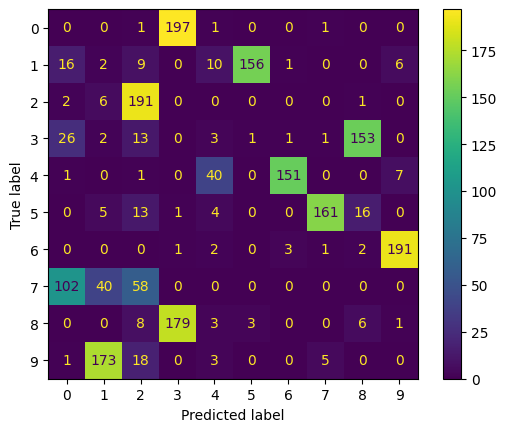

In [17]:
# Fazendo a matriz de confusão do resultado
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(labels, predictions)).plot()


### **5.2.** *Datasets Iris*

Repetindo o mesmo proceso para o iris, que é mais simples e de mais fácil interpretação.


In [18]:
from sklearn import datasets

iris = datasets.load_iris()
iris.data

array([[5.1000, 3.5000, 1.4000, 0.2000],
       [4.9000, 3.0000, 1.4000, 0.2000],
       [4.7000, 3.2000, 1.3000, 0.2000],
       [4.6000, 3.1000, 1.5000, 0.2000],
       [5.0000, 3.6000, 1.4000, 0.2000],
       [5.4000, 3.9000, 1.7000, 0.4000],
       [4.6000, 3.4000, 1.4000, 0.3000],
       [5.0000, 3.4000, 1.5000, 0.2000],
       [4.4000, 2.9000, 1.4000, 0.2000],
       [4.9000, 3.1000, 1.5000, 0.1000],
       [5.4000, 3.7000, 1.5000, 0.2000],
       [4.8000, 3.4000, 1.6000, 0.2000],
       [4.8000, 3.0000, 1.4000, 0.1000],
       [4.3000, 3.0000, 1.1000, 0.1000],
       [5.8000, 4.0000, 1.2000, 0.2000],
       [5.7000, 4.4000, 1.5000, 0.4000],
       [5.4000, 3.9000, 1.3000, 0.4000],
       [5.1000, 3.5000, 1.4000, 0.3000],
       [5.7000, 3.8000, 1.7000, 0.3000],
       [5.1000, 3.8000, 1.5000, 0.3000],
       [5.4000, 3.4000, 1.7000, 0.2000],
       [5.1000, 3.7000, 1.5000, 0.4000],
       [4.6000, 3.6000, 1.0000, 0.2000],
       [5.1000, 3.3000, 1.7000, 0.5000],
       [4.8000, 

In [20]:
# Vamos testar o algoritimo

fuzzy_iris = KFCM(n_clusters = 3, fuzziness = 1.6)
fuzzy_iris.fit(iris.data)

s: [1.0000 1.0000 1.0000]
99 47.742476978001505
s: [1.0000 1.0000 1.0000]
98 44.863988396371155
s: [1.0000 1.0000 1.0000]
97 43.97138114059787
s: [1.0000 1.0000 1.0000]
96 43.581944675718816
s: [1.0000 1.0000 1.0000]
95 43.3838816224082
s: [1.0000 1.0000 1.0000]
94 43.27192105412438
s: [1.0000 1.0000 1.0000]
93 43.20412718664866
s: [1.0000 1.0000 1.0000]
92 43.161521266807085
s: [1.0000 1.0000 1.0000]
91 43.13430862521891
s: [1.0000 1.0000 1.0000]
90 43.116842546511826
s: [1.0000 1.0000 1.0000]
89 43.10563416996405
s: [1.0000 1.0000 1.0000]
88 43.098456033628594
s: [1.0000 1.0000 1.0000]
87 43.09387002955347
s: [1.0000 1.0000 1.0000]
86 43.09094661759411
s: [1.0000 1.0000 1.0000]
85 43.08908654194856
s: [1.0000 1.0000 1.0000]
84 43.08790483119165
s: [1.0000 1.0000 1.0000]
83 43.087154995657805
s: [1.0000 1.0000 1.0000]
82 43.086679655844264
s: [1.0000 1.0000 1.0000]
81 43.08637855491199
s: [1.0000 1.0000 1.0000]
80 43.08618793968455
s: [1.0000 1.0000 1.0000]
79 43.08606732672452
s: [1.

In [21]:
n_repeticoes = 50
# Aqui, se cria uma partição crisp arbitrária
J_best, rand_best, MPC_best = np.inf, 0, 0
g_best, s_best = 0 , 0
J_all_iris = []
rand_todos_iris = []



for i in range(n_repeticoes):

  fuzzy_iris = KFCM(n_clusters = 3, fuzziness = 1.1, max_iter = 100)
  fuzzy_iris.fit(iris.data)
  J_all_iris = np.append(J_all_iris, fuzzy_iris.J)
  rand = adjusted_rand_score(iris.target, np.argmax(fuzzy_iris.u, axis = 1))
  rand_todos_iris = np.append(rand_todos_iris, rand)

  # Calcula o índice de Rand corrigido para a partição crisp utilizando
  # o argmax de cada linha da matriz de pertencimento
  if fuzzy_iris.J < J_best:
    J_best = fuzzy_iris.J
    g_best = fuzzy_iris.g
    s_best = fuzzy_iris.s
    predictions = np.argmax(fuzzy_iris.u, axis = 1)
    # Se tivermos o melhor J, calculamos o rand score e o MPC
    # Calcula o índice de Rand corrigido para a partição crisp utilizando
    # o argmax de cada linha da matriz de pertencimento
    rand_best = adjusted_rand_score(iris.target, np.argmax(fuzzy_iris.u, axis = 1))
    MPC_best = MPC(fuzzy_iris.n, fuzzy_iris.u, fuzzy_iris.n_clusters)




s: [1.0000 1.0000 1.0000]
99 134.82223073554152
s: [1.0000 1.0000 1.0000]
98 125.34508764713763
s: [1.0000 1.0000 1.0000]
97 123.79070579501567
s: [1.0000 1.0000 1.0000]
96 123.33559725052973
s: [1.0000 1.0000 1.0000]
95 122.94766322938236
s: [1.0000 1.0000 1.0000]
94 122.5107592948873
s: [1.0000 1.0000 1.0000]
93 121.75980780567654
s: [1.0000 1.0000 1.0000]
92 120.72806129744495
s: [1.0000 1.0000 1.0000]
91 119.9750234277658
s: [1.0000 1.0000 1.0000]
90 118.81544580468238
s: [1.0000 1.0000 1.0000]
89 116.98104125983784
s: [1.0000 1.0000 1.0000]
88 114.2476538769128
s: [1.0000 1.0000 1.0000]
87 108.73087785394839
s: [1.0000 1.0000 1.0000]
86 92.81430134922738
s: [1.0000 1.0000 1.0000]
85 66.74382919413691
s: [1.0000 1.0000 1.0000]
84 56.28563350880451
s: [1.0000 1.0000 1.0000]
83 52.98662877770673
s: [1.0000 1.0000 1.0000]
82 52.86108171960582
s: [1.0000 1.0000 1.0000]
81 52.84949422624024
s: [1.0000 1.0000 1.0000]
80 52.8466370981655
s: [1.0000 1.0000 1.0000]
79 52.84587260027587
s: [

In [22]:
J_all_iris

array([52.8456, 52.8456, 52.8456, 52.8456, 52.2497, 52.2497, 52.2497,
       52.2497, 76.1693, 52.8456, 52.8456, 76.1824, 52.2497, 52.8456,
       52.2497, 52.8456, 52.2497, 52.2497, 52.8456, 52.2497, 52.8456,
       52.8456, 52.8456, 76.1824, 52.2497, 52.2497, 52.8456, 52.2497,
       76.1693, 52.8456, 52.8456, 52.2497, 52.2497, 52.8456, 52.8456,
       52.2497, 52.8456, 52.2497, 76.1693, 76.1824, 52.8456, 52.8456,
       52.8456, 52.8456, 52.2497, 52.8456, 76.5022, 52.2497, 52.2497,
       52.2497])

In [23]:
rand_todos_iris

array([0.7445, 0.7445, 0.7445, 0.7445, 0.8857, 0.8857, 0.8857, 0.8857,
       0.4396, 0.7445, 0.7445, 0.4414, 0.8680, 0.7445, 0.8857, 0.7445,
       0.8857, 0.8857, 0.7445, 0.8857, 0.7445, 0.7445, 0.7445, 0.4414,
       0.8857, 0.8857, 0.7445, 0.8857, 0.4396, 0.7445, 0.7445, 0.8857,
       0.8857, 0.7445, 0.7445, 0.8857, 0.7445, 0.8680, 0.4396, 0.4414,
       0.7445, 0.7445, 0.7445, 0.7445, 0.8857, 0.7445, 0.4699, 0.8857,
       0.8857, 0.8857])

In [24]:
print(J_best, MPC_best, rand_best, '\n', '\n', g_best, '\n', '\n', s_best)

52.24966790088786 0.9833110550878645 0.8856970310281228 
 
 [[5.9273 2.7552 4.3107 1.3294]
 [5.0038 3.4229 1.4623 0.2426]
 [6.5785 3.0020 5.4904 2.0427]] 
 
 [[0.4593 1.2341 0.5012 3.5200]
 [0.3934 0.3464 1.6411 4.4717]
 [0.4560 1.9870 0.5365 2.0570]]


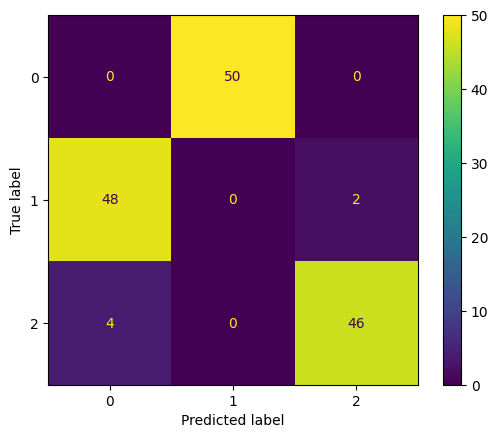

In [25]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(iris.target, predictions)).plot()
